# Cassandra Problem Statement 

## Importing various libraries, data cleaning and preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.special import boxcox1p
import warnings

In [2]:
import pandas as pd
train=pd.read_csv(r"C:\Users\Lenovo\Desktop\raunak\train_data.csv")
test=pd.read_csv(r"C:\Users\Lenovo\Desktop\raunak\test_data.csv")

In [3]:
# Global Settings
warnings.filterwarnings("ignore") # To ignore warnings
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting float output to 3 decimal points
rcParams['figure.figsize'] = 12,6 # Default figure size in inches

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72158 entries, 0 to 72157
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   UID                             72158 non-null  object 
 1   trip_creation_time              68643 non-null  object 
 2   route_schedule_uuid             69263 non-null  object 
 3   route_type                      72158 non-null  object 
 4   trip_uuid                       72158 non-null  object 
 5   source_center                   72158 non-null  object 
 6   source_name                     72158 non-null  object 
 7   destination_center              71355 non-null  object 
 8   destination_name                72158 non-null  object 
 9   od_start_time                   72158 non-null  object 
 10  od_end_time                     71438 non-null  object 
 11  start_scan_to_end_scan          72158 non-null  float64
 12  is_cutoff                       

In [5]:
train.head()

,UID,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,actual_time
0,lWYYrbNEdf,2018-09-15 02:23:18.656742,thanos::sroute:9d8ed3f7-a8af-4393-ad7a-c57a720...,FTL,trip-153697819865649878,IND832109AAB,Jamshedpur_Central_I_3 (Jharkhand),IND834002AAB,Ranchi_Hub (Jharkhand),2018-09-15 02:23:18.656742,...,2018-09-15 04:45:23,158.808,778.673,1228.736,2.783,77.989,20.793,28.476,3.293,100.000
1,iNJcHQlPCm,2018-09-30 15:07:48.971326,thanos::sroute:b9142a73-d68f-46ec-9afc-d145479...,FTL,trip-153832006897106333,IND422011AAD,Nashik_TgrniaRD_I (Maharashtra),IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),2018-09-30 22:38:13.903069,...,2018-10-01 05:38:30,81.388,227.479,NaN,3.625,68.518,18.787,34.612,4.277,61.000
2,U6N0M43qwR,2018-09-23 22:15:46.635975,thanos::sroute:883e99fa-50a3-40e0-a2e2-9b12ed6...,FTL,trip-153774094663572416,IND845305AAA,Raxaul_KairiyaT_D (Bihar),NaN,Muzaffrpur_Bbganj_I (Bihar),2018-09-24 03:56:37.016232,...,2018-09-24 09:21:30,134.487,400.072,1188.943,4.416,70.475,24.372,29.868,5.322,69.000
3,RrJUneuYNj,2018-09-21 05:11:44.833176,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153750670483274503,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND854326AAB,Purnia_Central_H_2 (Bihar),2018-09-22 10:08:32.593022,...,2018-09-22 14:09:17,262.867,510.124,999.421,2.947,101.877,19.589,27.794,4.266,300.000
4,7QLdD7iRC9,2018-09-18 01:10:49.936747,thanos::sroute:b43ec86d-59c1-452c-b4a9-807d357...,FTL,trip-153723305402762987,IND411033AAA,Pune_Tathawde_H (Maharashtra),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-18 01:10:49.936747,...,2018-09-18 12:14:05,379.389,NaN,NaN,1.999,46.571,22.671,26.972,3.554,286.000


In [6]:
train.drop('UID', inplace= True, axis=1) # Drop column and update same dataframe
test.drop('UID', inplace= True, axis= 1)
print(f'After dropping Id feature, shape of train data: {train.shape}, test data: {test.shape}')

After dropping Id feature, shape of train data: (72158, 23), test data: (72158, 22)


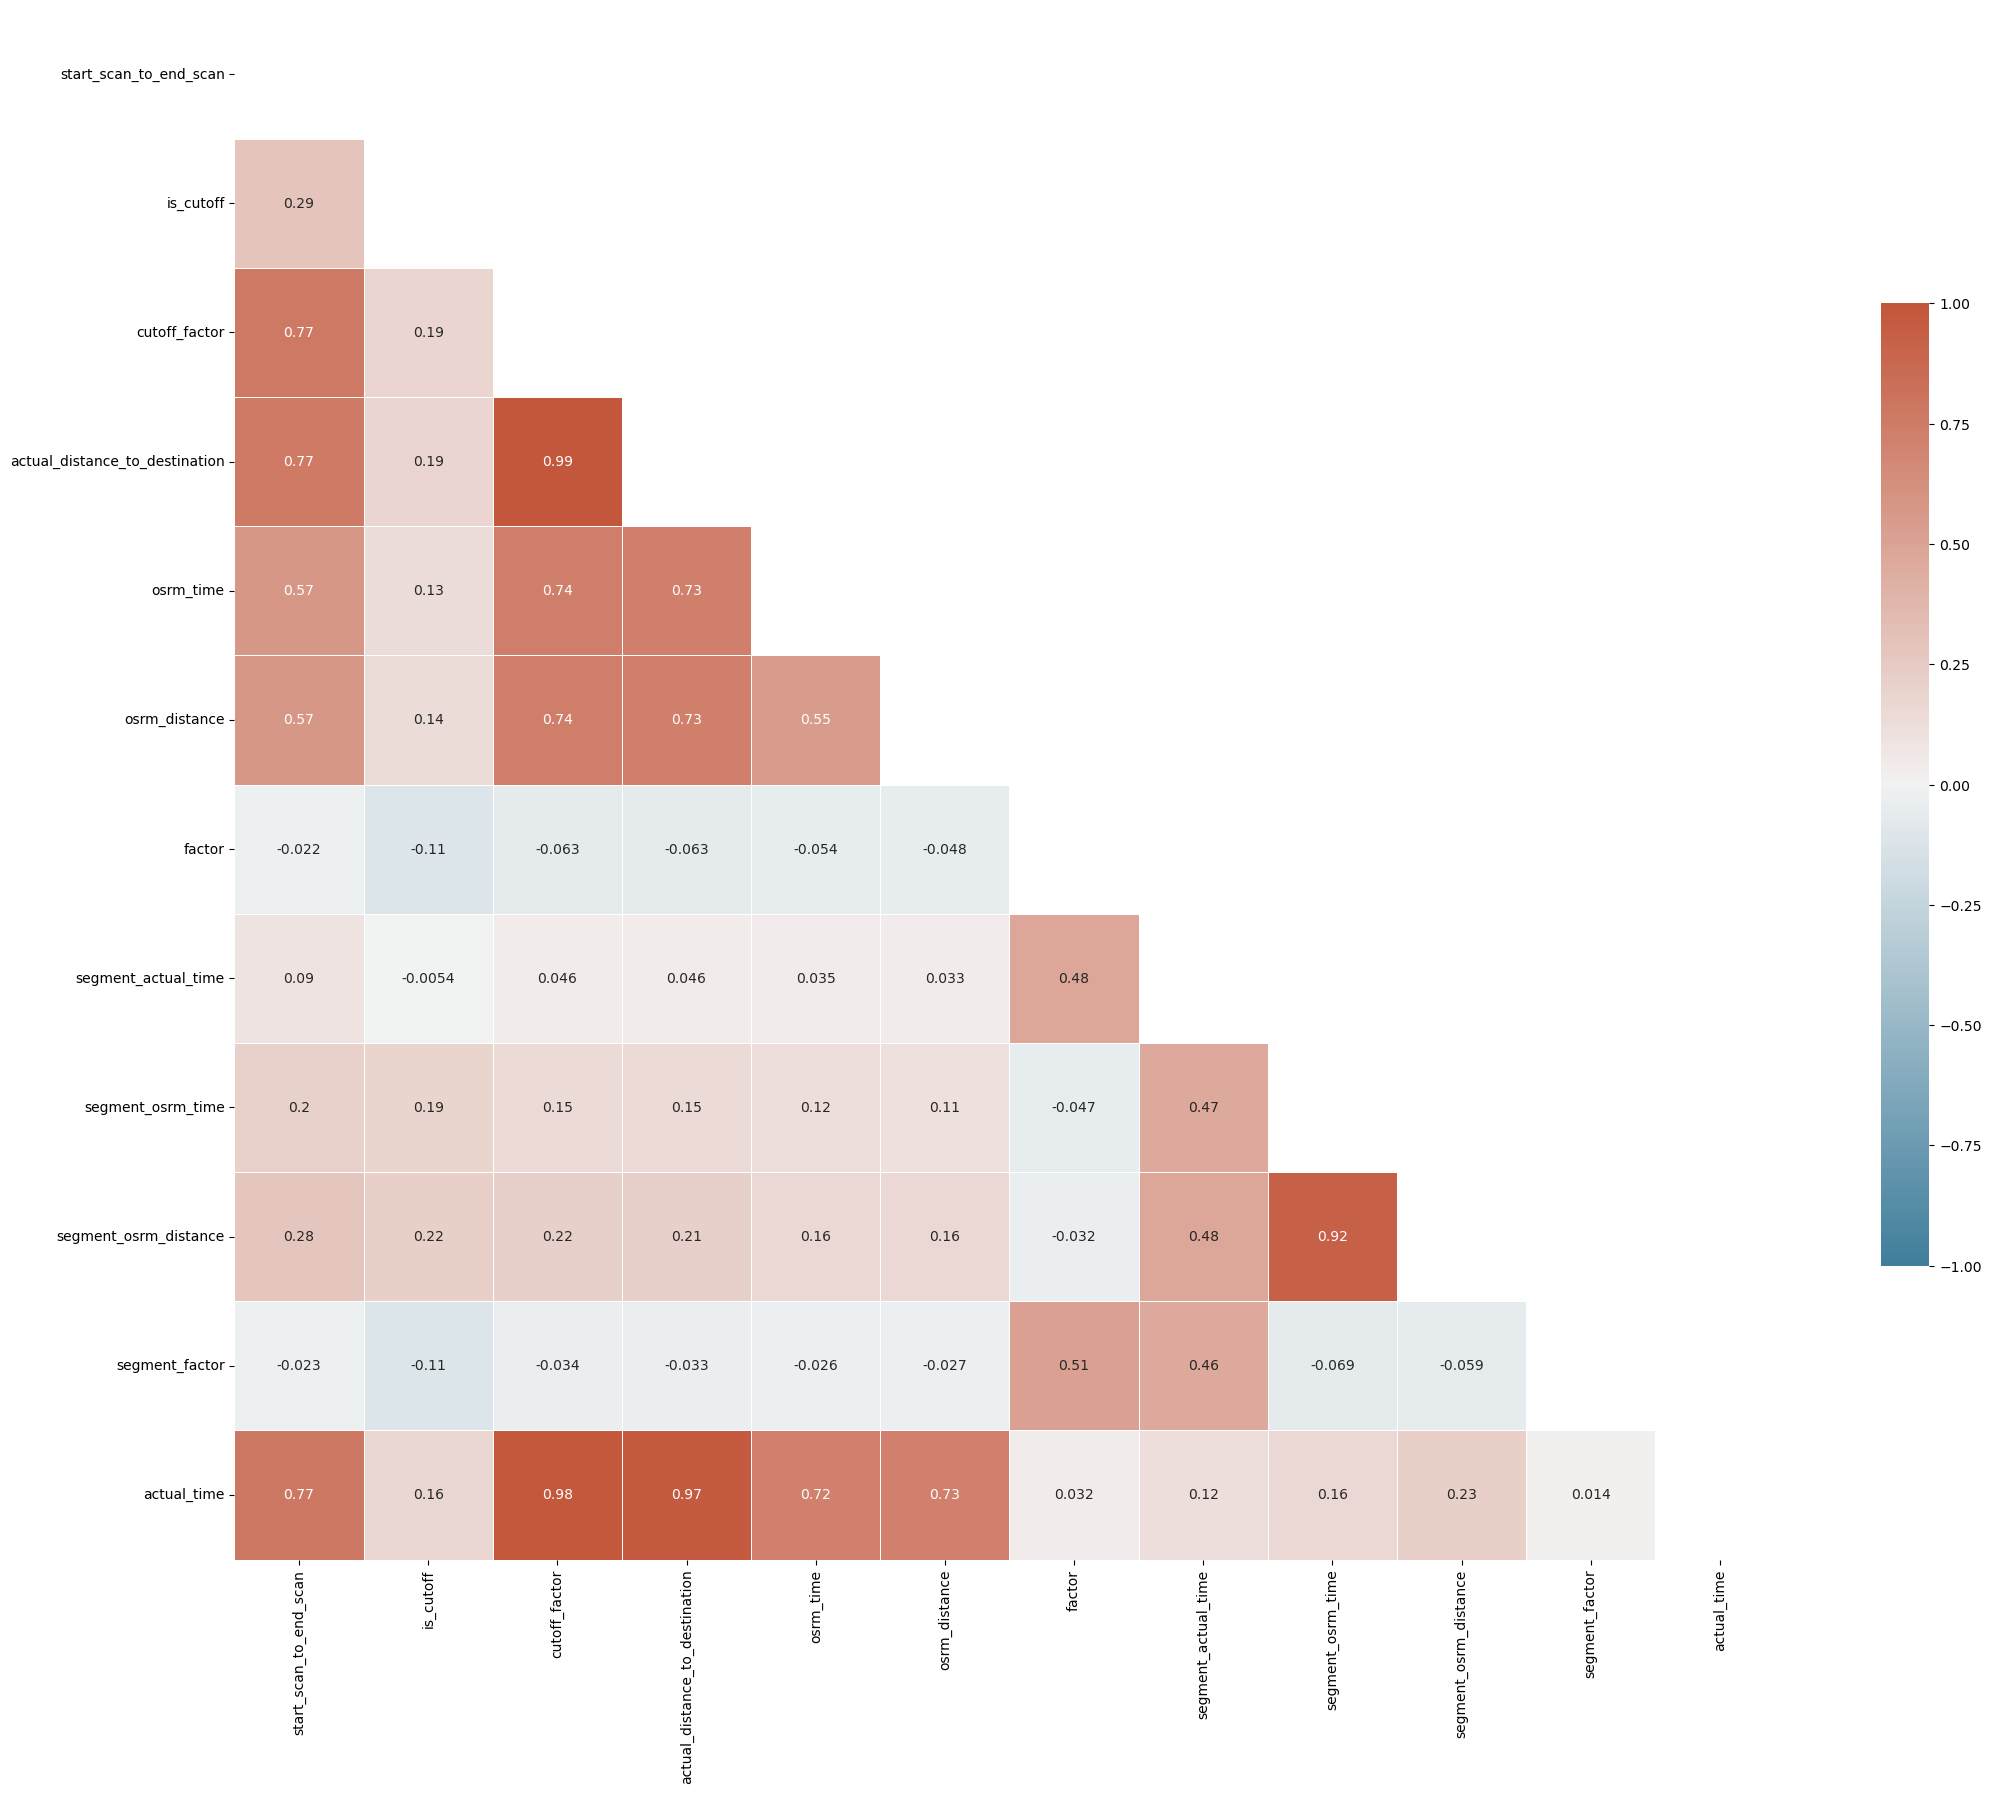

In [7]:
train_corr = train.corr(method= 'pearson') # Compute pairwise correlation of columns, excluding NA/null values. pearson : standard correlation coefficient
f, ax = plt.subplots(figsize=(25, 25))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(train_corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

ax = sns.heatmap(train_corr, vmin=-1, vmax=1, mask=mask, cmap=cmap, center=0, annot = True, square=True, linewidths=.5, cbar_kws= {"shrink": .5, 'orientation': 'vertical'}) 

In [8]:
#heavily linear corr to "start_scan_to_end_scan","cutoff_factor","actual_dis_to_dest","osrm_time","osrm_distance"

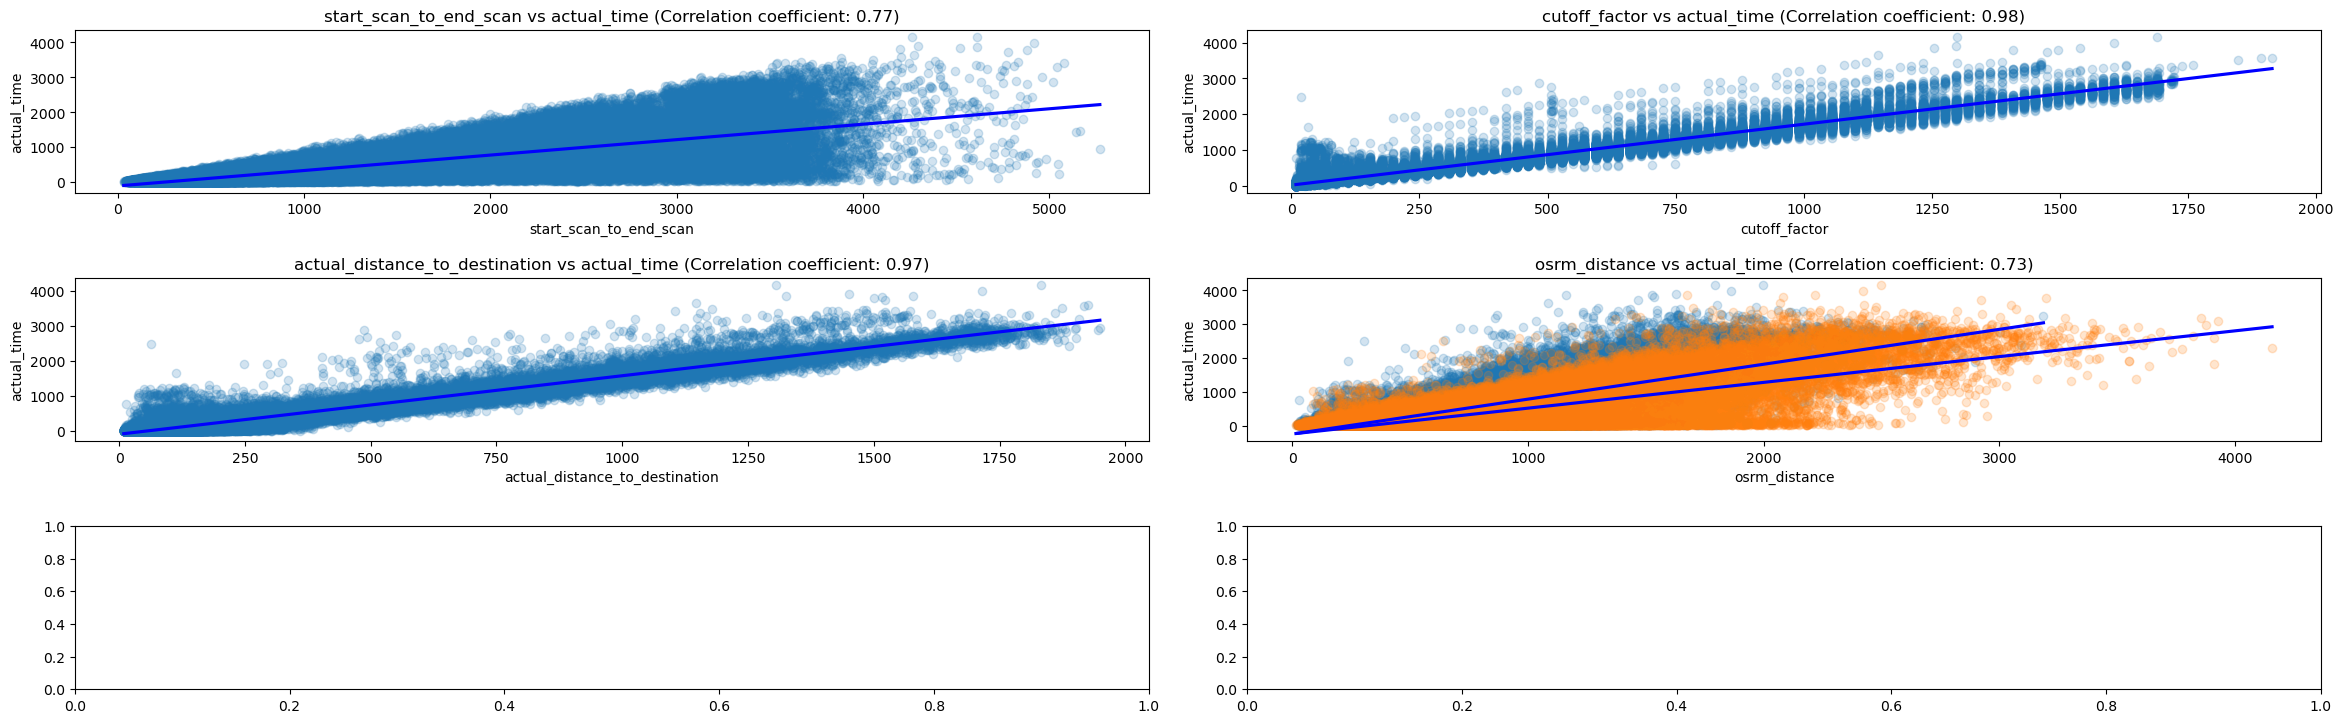

In [9]:
figure, ax = plt.subplots(3,2, figsize = (24,8))
figure.tight_layout(pad=4.0) # To increase the space between subplots

sns.regplot(data=train, x = 'start_scan_to_end_scan', y='actual_time', scatter_kws={'alpha':0.2}, line_kws={'color': 'blue'}, ax = ax[0,0]) # scatter_kws and line_kws used to pass additional keyword argument to change transparancy and line color
ax[0,0].set_title('start_scan_to_end_scan vs actual_time (Correlation coefficient: 0.77)', fontsize = 12)

sns.regplot(data=train, x = 'cutoff_factor', y='actual_time', scatter_kws={'alpha':0.2}, line_kws={'color': 'blue'}, ax = ax[0,1])
ax[0,1].set_title('cutoff_factor vs actual_time (Correlation coefficient: 0.98)', fontsize = 12)

sns.regplot(data=train, x = 'actual_distance_to_destination', y='actual_time', scatter_kws={'alpha':0.2}, line_kws={'color': 'blue'}, ax = ax[1,0])
ax[1,0].set_title('\nactual_distance_to_destination vs actual_time (Correlation coefficient: 0.97)', fontsize = 12)

sns.regplot(data=train, x = 'osrm_time', y='actual_time', scatter_kws={'alpha':0.2}, line_kws={'color': 'blue'}, ax = ax[1,1])
ax[1,1].set_title('osrm_time vs actual_time (Correlation coefficient: 0.72)', fontsize = 12)

sns.regplot(data=train, x = 'osrm_distance', y='actual_time', scatter_kws={'alpha':0.2}, line_kws={'color': 'blue'}, ax = ax[1,1])
ax[1,1].set_title('\nosrm_distance vs actual_time (Correlation coefficient: 0.73)', fontsize = 12)

plt.show()

<AxesSubplot:>

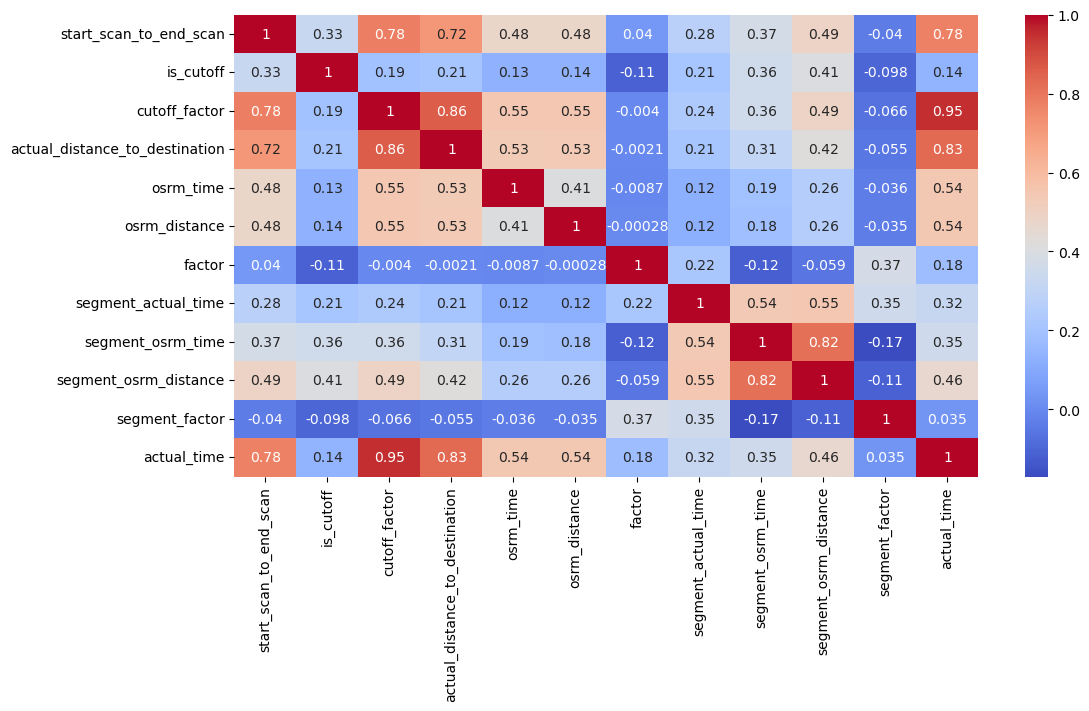

In [10]:
# Calculate Spearman's rank correlation coefficients for all columns
corr_matrix = train.corr(method='spearman')

# Plot a heatmap of the correlation matrix using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

## Outlier detection

In [11]:
num_cols = list(train.select_dtypes(include=['float','int']))

In [12]:
num_cols

['start_scan_to_end_scan',
 'cutoff_factor',
 'actual_distance_to_destination',
 'osrm_time',
 'osrm_distance',
 'factor',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_factor',
 'actual_time']

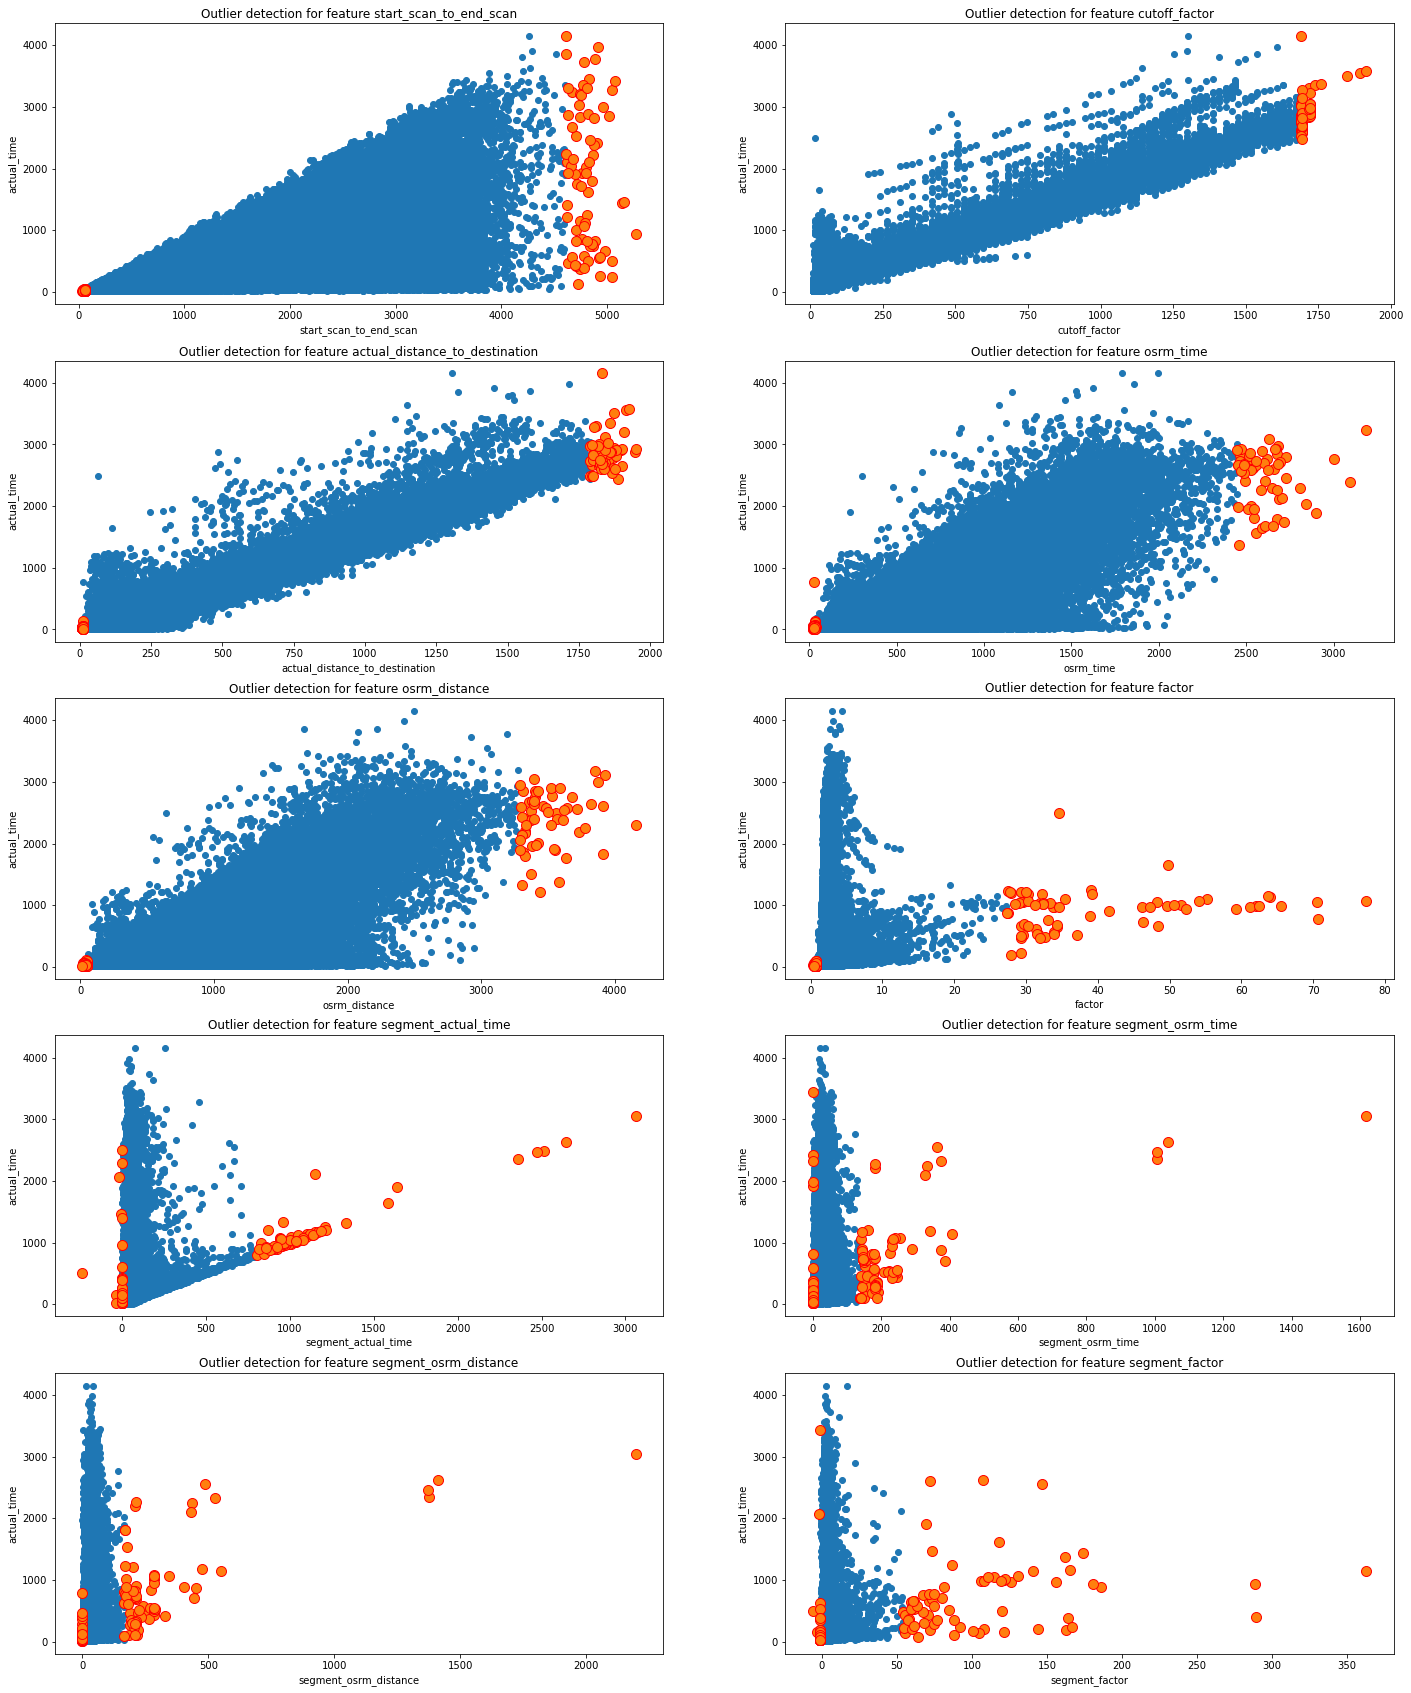

outliers: [365, 505, 1738, 2306, 2743, 2797, 3543, 3550, 4980, 5438, 6129, 6158, 6617, 6960, 8011, 8987, 9559, 10250, 12357, 12872, 13036, 14485, 14599, 15836, 16588, 16931, 17713, 17872, 18688, 19110, 19119, 20117, 22052, 22218, 22402, 22842, 22850, 22885, 23566, 24286, 24594, 25212, 26184, 26268, 26426, 26845, 27026, 27824, 28401, 28947, 29454, 30071, 30186, 30408, 30648, 30773, 31120, 31187, 32263, 32434, 33865, 34103, 34627, 34689, 34778, 35548, 35680, 35755, 36047, 36470, 36750, 37029, 38177, 38267, 39839, 40033, 41095, 41370, 41522, 42463, 43916, 44916, 45596, 45698, 46815, 47464, 47609, 47914, 48683, 48753, 49175, 49555, 49588, 49602, 49689, 50127, 50324, 50473, 52012, 52560, 53725, 53757, 54379, 54385, 55087, 55200, 55946, 56074, 56191, 57844, 58127, 58452, 58959, 59679, 59916, 60653, 60764, 60824, 62294, 62921, 63376, 63651, 64233, 64493, 64753, 64957, 65024, 65417, 65434, 65892, 66110, 66660, 66991, 67403, 67492, 67690, 67980, 68376, 68672, 69019, 69629, 70603, 70722, 70850, 

In [13]:
min_percentile= 0.001
max_percentile= 0.999
# Use numeric features
features = ['start_scan_to_end_scan',
 'cutoff_factor',
 'actual_distance_to_destination',
 'osrm_time',
 'osrm_distance',
 'factor',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_factor',]
target= 'actual_time'
nrows= int(np.ceil(len(features)/2))
ncols= 2 

def detect_and_remove_outliers(inline_delete= True):
    global train
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (24, nrows * 6))
    outliers = []
    cnt = 0
    for row in range (0, nrows):
        for col in range (0, ncols):
            # df_outliers = outlier_detection_using_percentile(features[cnt])
            # Outlier detection using percentile
            min_thresold, max_thresold = train[features[cnt]].quantile([min_percentile, max_percentile])
            # print(f'outlier_detection_using_percentile()> min_thresold: {min_thresold}, max_thresold: {max_thresold}')
            # print (f'No of outliers below min_thresold: {len(train[train[feature] < min_thresold])}')
            # print (f'No of outliers above max_thresold: {len(train[train[feature] > max_thresold])}')
            df_outliers = train[(train[features[cnt]] < min_thresold) | (train[features[cnt]] > max_thresold)]

            # Updaing list of outliers
            outliers = outliers + df_outliers.index.tolist()

            # Plot feature vs target using scatter plot
            ax[row][col].scatter(x = train[features[cnt]], y= train[target])
     
            # Mark outlier records in same scatter plot
            ax[row][col].scatter(x= df_outliers[features[cnt]],  y=df_outliers[target], marker ="o", edgecolor ="red", s = 100)
            ax[row][col].set_xlabel(features[cnt])
            ax[row][col].set_ylabel(target)
            ax[row][col].set_title('Outlier detection for feature ' + features[cnt])

            if inline_delete: 
                # Drop the outliers inline
                # drop_outliers(df_outliers.index.tolist())
                # print(f'Shape of train data= {train.shape}')
                train = train.drop(df_outliers.index.tolist())
                train.reset_index(drop = True, inplace = True)
                # print(f'Shape of train data= {train.shape}')

            cnt = cnt + 1
            if cnt >= len(features):
                break
    plt.show()

    print(f'outliers: {outliers}')
    unique_outliers= list(set(outliers))
    print(f'unique_outliers: {unique_outliers}')
    
    if inline_delete == False: 
        # Drop the unique outliers from final list
        print(f'Shape of train data= {train.shape}')
        train = train.drop(unique_outliers)
        train.reset_index(drop = True, inplace = True)
        print(f'Shape of train data= {train.shape}')
        
        
detect_and_remove_outliers(inline_delete= False)

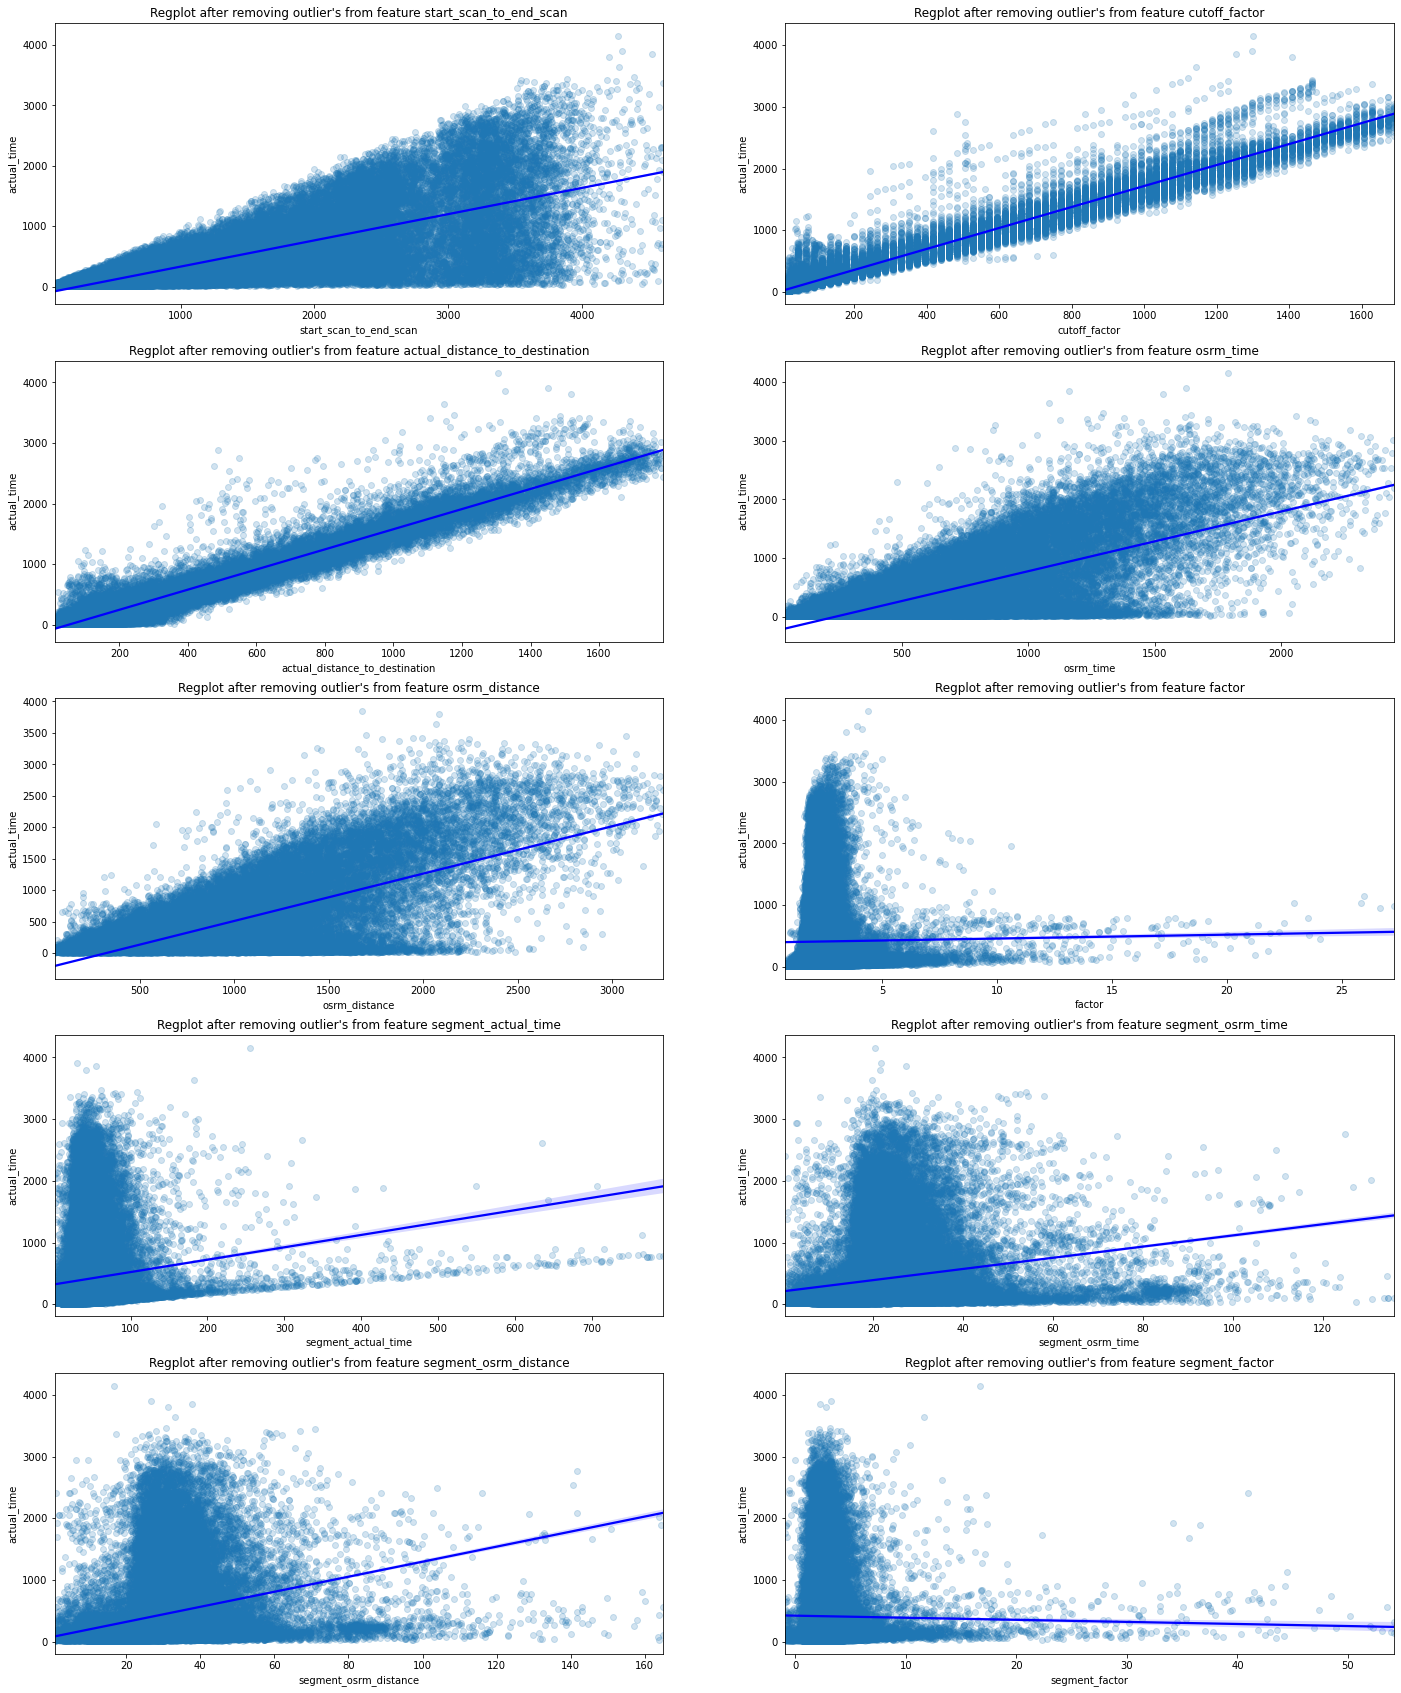

In [11]:
# Lets visulaize the feature(after droping outliers) and target relationship using Regplot
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (24, nrows * 6))

outliers = []
cnt = 0
for row in range (0, nrows):
    for col in range (0, ncols):
        sns.regplot(data=train, x = features[cnt], y= target, scatter_kws={'alpha':0.2}, line_kws={'color': 'blue'}, ax = ax[row,col]) # scatter_kws and line_kws used to pass additional keyword argument to change transparancy and line color
        ax[row,col].set_title("Regplot after removing outlier's from feature " + features[cnt], fontsize = 12)
        cnt = cnt + 1
        if cnt >= len(features):
            break
plt.show()

## Data preprocessing

In [11]:
y_train = train.actual_time
all_data = pd.concat((train,test)).reset_index(drop = True) #  Drops the current index of the DataFrame and replaces it with an index of increasing integers
all_data.drop(['actual_time'], axis=1, inplace=True) # Delete SalePrice from all data
print('Shape of all_data= {}'.format(all_data.shape))
all_data.head()

Shape of all_data= (144316, 22)


,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,2018-09-15 02:23:18.656742,thanos::sroute:9d8ed3f7-a8af-4393-ad7a-c57a720...,FTL,trip-153697819865649878,IND832109AAB,Jamshedpur_Central_I_3 (Jharkhand),IND834002AAB,Ranchi_Hub (Jharkhand),2018-09-15 02:23:18.656742,2018-09-15 06:33:35.824186,...,44,2018-09-15 04:45:23,158.808,778.673,1228.736,2.783,77.989,20.793,28.476,3.293
1,2018-09-30 15:07:48.971326,thanos::sroute:b9142a73-d68f-46ec-9afc-d145479...,FTL,trip-153832006897106333,IND422011AAD,Nashik_TgrniaRD_I (Maharashtra),IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),2018-09-30 22:38:13.903069,2018-10-01 06:48:37.637477,...,22,2018-10-01 05:38:30,81.388,227.479,NaN,3.625,68.518,18.787,34.612,4.277
2,2018-09-23 22:15:46.635975,thanos::sroute:883e99fa-50a3-40e0-a2e2-9b12ed6...,FTL,trip-153774094663572416,IND845305AAA,Raxaul_KairiyaT_D (Bihar),NaN,Muzaffrpur_Bbganj_I (Bihar),2018-09-24 03:56:37.016232,2018-09-24 11:15:00.826140,...,22,2018-09-24 09:21:30,134.487,400.072,1188.943,4.416,70.475,24.372,29.868,5.322
3,2018-09-21 05:11:44.833176,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153750670483274503,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND854326AAB,Purnia_Central_H_2 (Bihar),2018-09-22 10:08:32.593022,2018-09-22 19:17:22.242888,...,176,2018-09-22 14:09:17,262.867,510.124,999.421,2.947,101.877,19.589,27.794,4.266
4,2018-09-18 01:10:49.936747,thanos::sroute:b43ec86d-59c1-452c-b4a9-807d357...,FTL,trip-153723305402762987,IND411033AAA,Pune_Tathawde_H (Maharashtra),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-18 01:10:49.936747,2018-09-18 17:58:48.449251,...,198,2018-09-18 12:14:05,379.389,NaN,NaN,1.999,46.571,22.671,26.972,3.554


In [12]:
for col in all_data:
    print(col)
    print(all_data[col].unique().size)
    print('\n')

trip_creation_time
14785


route_schedule_uuid
1498


route_type
2


trip_uuid
14787


source_center
1496


source_name
1496


destination_center
1467


destination_name
1466


od_start_time
26223


od_end_time
26214


start_scan_to_end_scan
74044


is_cutoff
2


cutoff_factor
501


cutoff_timestamp
92458


actual_distance_to_destination
144237


osrm_time
59211


osrm_distance
128089


factor
97888


segment_actual_time
72722


segment_osrm_time
72335


segment_osrm_distance
135285


segment_factor
75136




In [13]:
all_data.is_cutoff.value_counts()

True     118336
False     25980
Name: is_cutoff, dtype: int64

In [14]:
# Get the list of column that have null values
col_na = all_data.columns[all_data.isnull().any()]

# Get missing value count in each column
all_data_na_cnt = all_data[col_na].isnull().sum()

# Get missing values percentage for each column
all_data_na = (all_data[col_na].isnull().sum()/len(all_data)) * 100
#all_data_na = all_data_na.sort_values(ascending = False)
all_data_na = pd.DataFrame({'Total Null Val': all_data_na_cnt, 'Null Value %': all_data_na})
all_data_na = all_data_na.sort_values(by='Null Value %', ascending=False)
all_data_na

,Total Null Val,Null Value %
osrm_time,14432,10.000
osrm_distance,14432,10.000
trip_creation_time,3515,2.436
route_schedule_uuid,2895,2.006
factor,1644,1.139
segment_factor,1159,0.803
cutoff_timestamp,930,0.644
destination_center,803,0.556
od_end_time,720,0.499


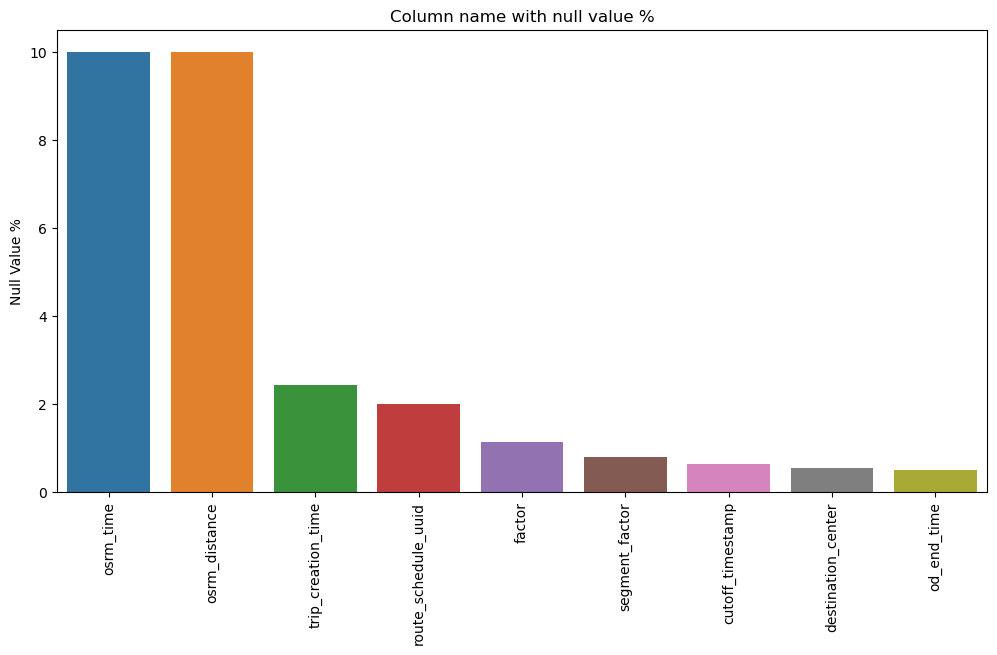

In [15]:
sns.barplot(x=all_data_na.index, y='Null Value %', data=all_data_na)
plt.xticks(rotation = 90) # For better visulaization of column names
plt.title('Column name with null value %')
plt.show()

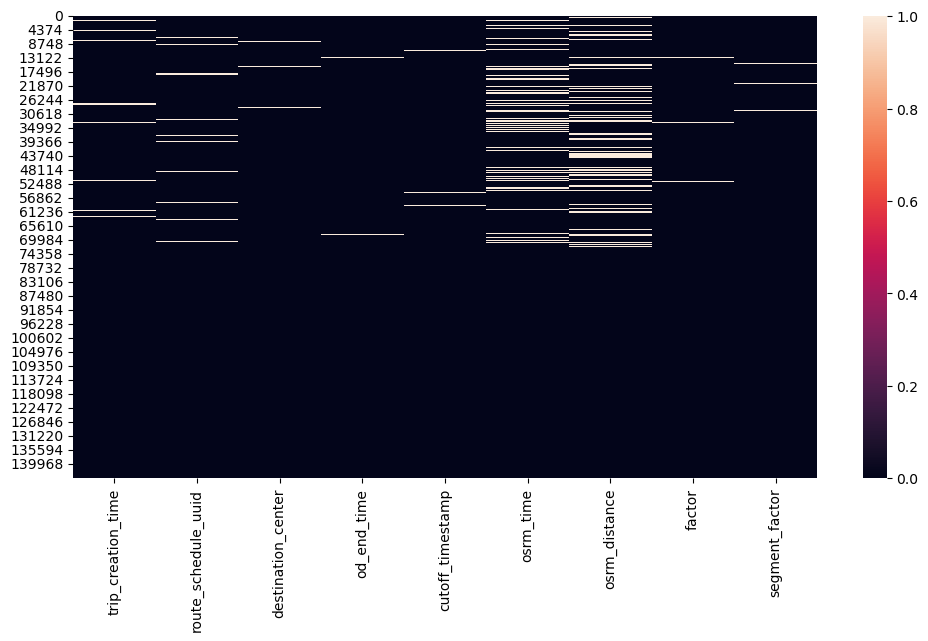

In [16]:
# Visualize missing values using heatmap. White lines represent missing values
sns.heatmap(all_data[col_na].isnull())
plt.show()

In [17]:
cat_cols = list(all_data.select_dtypes(include='object'))
cat_cols

['trip_creation_time',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name',
 'od_start_time',
 'od_end_time',
 'cutoff_timestamp']

In [18]:
for col in ('route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name'):
    all_data[col] = all_data[col].fillna('None')
    print(f'Feature: {col}, Null Count: {all_data[col].isnull().sum()}, Unique Values: {all_data[col].unique()}')

Feature: route_schedule_uuid, Null Count: 0, Unique Values: ['thanos::sroute:9d8ed3f7-a8af-4393-ad7a-c57a7209ed8a'
 'thanos::sroute:b9142a73-d68f-46ec-9afc-d145479184b6'
 'thanos::sroute:883e99fa-50a3-40e0-a2e2-9b12ed6ab8bf' ...
 'thanos::sroute:11448700-b0d6-4009-afa6-79d2b56f51bb'
 'thanos::sroute:629ad783-00c1-459b-ac3e-390dc3aa1a45'
 'thanos::sroute:72cf9feb-f4e3-4a55-b92a-0b686ee8fabc']
Feature: route_type, Null Count: 0, Unique Values: ['FTL' 'Carting']
Feature: trip_uuid, Null Count: 0, Unique Values: ['trip-153697819865649878' 'trip-153832006897106333'
 'trip-153774094663572416' ... 'trip-153843358146166127'
 'trip-153845195330673703' 'trip-153782197111966283']
Feature: source_center, Null Count: 0, Unique Values: ['IND832109AAB' 'IND422011AAD' 'IND845305AAA' ... 'IND500035AAA'
 'IND276140AAA' 'IND400016AAA']
Feature: source_name, Null Count: 0, Unique Values: ['Jamshedpur_Central_I_3 (Jharkhand)' 'Nashik_TgrniaRD_I (Maharashtra)'
 'Raxaul_KairiyaT_D (Bihar)' ... 'Hyd_LB-Nagar_

In [19]:
for col in ('od_start_time', 'od_end_time','trip_creation_time','cutoff_timestamp'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
    print(f'Feature: {col}, Null Count: {all_data[col].isnull().sum()}, Unique Values: {all_data[col].unique()}')

Feature: od_start_time, Null Count: 0, Unique Values: ['2018-09-15 02:23:18.656742' '2018-09-30 22:38:13.903069'
 '2018-09-24 03:56:37.016232' ... '2018-10-02 03:45:53.307132'
 '2018-09-24 20:46:11.119917' '2018-09-18 00:34:51.206487']
Feature: od_end_time, Null Count: 0, Unique Values: ['2018-09-15 06:33:35.824186' '2018-10-01 06:48:37.637477'
 '2018-09-24 11:15:00.826140' ... '2018-10-02 05:41:40.273967'
 '2018-09-24 23:32:29.379801' '2018-09-18 02:13:13.051813']
Feature: trip_creation_time, Null Count: 0, Unique Values: ['2018-09-15 02:23:18.656742' '2018-09-30 15:07:48.971326'
 '2018-09-23 22:15:46.635975' ... '2018-10-01 22:39:41.461876'
 '2018-10-02 03:45:53.307132' '2018-09-24 20:46:11.119917']
Feature: cutoff_timestamp, Null Count: 0, Unique Values: ['2018-09-15 04:45:23' '2018-10-01 05:38:30' '2018-09-24 09:21:30' ...
 '2018-09-27 08:18:22' '2018-09-17 12:30:41.952774' '2018-09-17 12:05:21']


In [20]:
for col in ('start_scan_to_end_scan',
 'cutoff_factor',
 'actual_distance_to_destination',
 'osrm_time',
 'osrm_distance',
 'factor',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_factor'):
    all_data[col] = all_data[col].fillna(0)

Shape of data: (144316, 22)
Count of null values: 0


<AxesSubplot:>

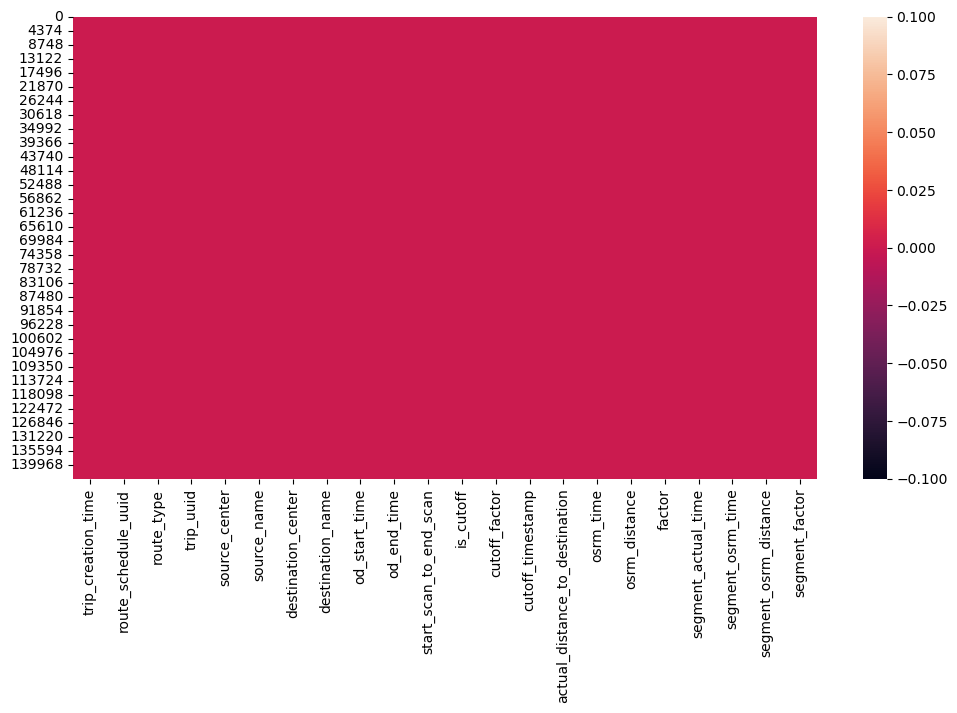

In [21]:
print(f'Shape of data: {all_data.shape}')
print(f'Count of null values: {all_data.isnull().sum().sum()}')
sns.heatmap(all_data.isnull())

In [22]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   trip_creation_time              144316 non-null  object 
 1   route_schedule_uuid             144316 non-null  object 
 2   route_type                      144316 non-null  object 
 3   trip_uuid                       144316 non-null  object 
 4   source_center                   144316 non-null  object 
 5   source_name                     144316 non-null  object 
 6   destination_center              144316 non-null  object 
 7   destination_name                144316 non-null  object 
 8   od_start_time                   144316 non-null  object 
 9   od_end_time                     144316 non-null  object 
 10  start_scan_to_end_scan          144316 non-null  float64
 11  is_cutoff                       144316 non-null  bool   
 12  cutoff_factor   

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def get_highest_vif_feature(df, thresh=5):
    '''
    Ref: https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python
    
    Calculates VIF each feature in a pandas dataframe
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with features removed
    '''
   
    const = add_constant(df)
    print(f'Shape of data after adding const column: {const.shape}')
    cols = const.columns
    
    # Calculating VIF for each feature
    vif_df = pd.Series([ (variance_inflation_factor(const.values, i)) for i in range(const.shape[1]) ], index= const.columns).to_frame()
    
    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
    vif_df = vif_df[vif_df['VIF'] > thresh]

    if vif_df.empty:
        print('DataFrame is empty!')
        return None
    else:
        print(f'\nFeatures above VIF threshold: {vif_df.to_dict()}')       
        # Feature with highest VIF value
        return list(vif_df.index)[0]
        print(f'Lets delete the feature with highest VIF value: {list(vif_df.index)[0]}')


# Selecting only numeric features
print(f'Shape of input data: {all_data.shape}')
numeric_feats = all_data.dtypes[all_data.dtypes == "float"].index
print(f"Calculating VIF for {len(numeric_feats)} numerical features")

df_numeric = all_data[numeric_feats]
print(f'Shape of df_numeric: {df_numeric.shape}')
    
feature_to_drop = None
feature_to_drop_list = []
while True:
    feature_to_drop = get_highest_vif_feature(df_numeric, thresh=5)
    print(f'feature_to_drop: {feature_to_drop}')
    if feature_to_drop is None:
        print('No more features to drop!')
        break
    else:
        feature_to_drop_list.append(feature_to_drop)
        df_numeric = df_numeric.drop(feature_to_drop, axis=1)
        print(f'Feature {feature_to_drop} droped from df_numeric')

print(f'\nfeature_to_drop_list: {feature_to_drop_list}')

Shape of input data: (144316, 22)
Calculating VIF for 9 numerical features
Shape of df_numeric: (144316, 9)
Shape of data after adding const column: (144316, 10)

Features above VIF threshold: {'VIF': {'segment_osrm_distance': 8.322135939147957, 'segment_osrm_time': 7.803091915203487}}
feature_to_drop: segment_osrm_distance
Feature segment_osrm_distance droped from df_numeric
Shape of data after adding const column: (144316, 9)
DataFrame is empty!
feature_to_drop: None
No more features to drop!

feature_to_drop_list: ['segment_osrm_distance']


In [24]:
print(f'Shape of traning data= {all_data.shape}')
all_data = all_data.drop(['segment_osrm_distance'], axis= 1) # Default drop axis is 0 i.e. rows 
all_data.reset_index(drop = True, inplace = True)
print(f'Shape of traning data= {all_data.shape}')

Shape of traning data= (144316, 22)
Shape of traning data= (144316, 21)


## Feature Scaling 

In [25]:
#Lets check the count of numerical and categorical features
cat_feats = all_data.dtypes[all_data.dtypes == "object"].index
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
print(f"Number of categorical features: {len(cat_feats)}, Numerical features: {len(numeric_feats)}")

skew_features = all_data[numeric_feats].apply(lambda x: stats.skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_features})

print(f'Skew in numerical features. Shape of skewness: {skewness.shape}')
skewness.head(10)

# todo add histo and probability plot of skewed features

Number of categorical features: 11, Numerical features: 10
Skew in numerical features. Shape of skewness: (10, 1)


,Skew
segment_factor,46.424
segment_osrm_time,18.795
segment_actual_time,16.334
factor,16.155
cutoff_factor,1.986
actual_distance_to_destination,1.934
osrm_time,1.426
osrm_distance,1.419
start_scan_to_end_scan,1.072
is_cutoff,-1.666


In [26]:
skew_features

segment_factor                   46.424
segment_osrm_time                18.795
segment_actual_time              16.334
factor                           16.155
cutoff_factor                     1.986
actual_distance_to_destination    1.934
osrm_time                         1.426
osrm_distance                     1.419
start_scan_to_end_scan            1.072
is_cutoff                        -1.666
dtype: float64

In [27]:
high_skew = skew_features[abs(skew_features) > 0.5]
skew_index = high_skew.index
for i in skew_index:
    print(i)
    print(all_data[i].max())
    print(all_data[i].min())
    print("\n")

segment_factor
574.25
-23.444444444444443


segment_osrm_time
1617.7267593496892
0.0


segment_actual_time
3060.6525223524686
-236.341748102275


factor
77.38709677419355
0.0


cutoff_factor
1927
9


actual_distance_to_destination
1949.21040322968
9.00004535977208


osrm_time
3186.653165853727
0.0


osrm_distance
4156.700085416224
0.0


start_scan_to_end_scan
7898.0
21.0


is_cutoff
True
False




In [28]:
# We will use threshold '0.5' to apply Box Cox transaformation.
high_skew = skew_features[(skew_features) > 0.5]
skew_index = high_skew.index

# Use box-cox transformation to transform numeric values with high skew into normal distribution. 
# Here we are using 'boxcox_normmax()' function to compute optimal Box-Cox transform parameter(lmbda) for input data.
# We are using the default method(pearsonr) to determine the optimal transform parameter (lmbda) for boxcox1p
# boxcox1p compute the Box-Cox transformation of 1 + x. (log 0 is undefined)
for i in skew_index:
    if(all_data[i].min()<0):
        # add a constant value to make the data positive
        all_data[i] = all_data[i] + abs(all_data[i].min()) + 1

    # apply the Box-Cox transformation
    all_data[i] = boxcox1p(all_data[i], stats.boxcox_normmax(all_data[i] + 1))
    
#     xt, lmbda = stats.yeojohnson(all_data[i])
#     all_data[i]=stats.yeojohnson(all_data[i],lmbda)


In [29]:
#Lets check the count of numerical and categorical features
cat_feats = all_data.dtypes[all_data.dtypes == "object"].index
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
print(f"Number of categorical features: {len(cat_feats)}, Numerical features: {len(numeric_feats)}")

skew_features = all_data[numeric_feats].apply(lambda x: stats.skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_features})

print(f'Skew in numerical features. Shape of skewness: {skewness.shape}')
skewness.head(10)

# todo add histo and probability plot of skewed features

Number of categorical features: 11, Numerical features: 10
Skew in numerical features. Shape of skewness: (10, 1)


,Skew
segment_osrm_time,0.046
cutoff_factor,0.027
osrm_time,-0.010
actual_distance_to_destination,-0.011
osrm_distance,-0.017
factor,-0.029
start_scan_to_end_scan,-0.107
segment_actual_time,-0.185
is_cutoff,-1.666
segment_factor,-3.006


## Hashing cardinal columns

In [30]:
# Define the hashing function
def hash_function(value):
    return hash(value) % 1000  # mod 1000 to limit the range of hash values

In [31]:
# Apply the hashing function to the 'category' column
all_data['source_center_hashed'] = all_data['source_center'].apply(hash_function)
all_data['destination_center_hashed'] = all_data['destination_center'].apply(hash_function)
all_data['route_schedule_uuid_hashed'] = all_data['route_schedule_uuid'].apply(hash_function)
all_data['source_name_hashed'] = all_data['source_name'].apply(hash_function)
all_data['destination_name_hashed'] = all_data['destination_name'].apply(hash_function)

## Adding new features

In [32]:
#time
all_data['startTime']=pd.to_datetime(all_data['od_start_time'], format="%Y-%m-%d %H:%M:%S.%f")
all_data['endTime']=pd.to_datetime(all_data['od_end_time'], format="%Y-%m-%d %H:%M:%S.%f")
all_data['time']=all_data['endTime']-all_data['startTime']
all_data.drop(['od_start_time',	'od_end_time','startTime'	,'endTime'],axis=1,inplace=True)
all_data['Time']=all_data['time'].apply(lambda x: x.total_seconds())
all_data.drop(['time'],axis=1,inplace=True)

In [33]:
#cutoff_hour
all_data['cutoff_timestamp']=pd.to_datetime(all_data['cutoff_timestamp'], format="%Y-%m-%d %H:%M:%S.%f")

all_data['cutoff_hour']=all_data['cutoff_timestamp'].apply(lambda x: x.hour)
all_data['cutoff_day']=all_data['cutoff_timestamp'].apply(lambda x: x.day)
all_data['cutoff_month']=all_data['cutoff_timestamp'].apply(lambda x: x.month)

all_data.drop(['cutoff_timestamp'],axis=1,inplace=True)

In [34]:
#time stamp creation hour
all_data['creation_hour']=pd.to_datetime(all_data['trip_creation_time'], format="%Y-%m-%d %H:%M:%S.%f")
all_data.drop(['trip_creation_time'],axis=1,inplace=True)
all_data['creation_hour']=all_data['creation_hour'].apply(lambda x: x.hour)

In [35]:
#state
# use regular expressions to extract text between brackets
all_data['source_name'] = all_data['source_name'].str.extract(r'\((.*?)\)')
all_data['destination_name'] = all_data['destination_name'].str.extract(r'\((.*?)\)')

In [36]:
#polynomial
all_data['start_scan_to_end_scan_2']=all_data['start_scan_to_end_scan'] ** 2
all_data['osrm_time_2']=all_data['osrm_time'] ** 2
all_data['osrm_distance_2']=all_data['osrm_distance'] ** 2
all_data['factor_2']=all_data['factor'] ** 2

In [37]:
#same state
all_data['is_in_same_state'] = all_data['source_name'] == all_data['destination_name']

In [38]:
#products
all_data['time_product']=all_data['osrm_time'] * all_data['segment_osrm_time'] * all_data['segment_actual_time']
all_data['distance_product']=all_data['actual_distance_to_destination'] * all_data['osrm_distance']

In [39]:
#FTL
all_data["IsFTL"] = (all_data["route_type"] == "FTL") * 1

In [40]:
all_data['is_sept']=(all_data["cutoff_month"] == 9) * 1
all_data['is_oct']=(all_data["cutoff_month"] == 10) * 1

In [41]:
print(f'Shape all_data: {all_data.shape}')

Shape all_data: (144316, 37)


In [42]:
#Lets check the count of numerical and categorical features
cat_feats = all_data.dtypes[all_data.dtypes == "object"].index
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
print(f"Number of categorical features: {len(cat_feats)}, Numerical features: {len(numeric_feats)}")

print(f"\nList of cetagorical features: { cat_feats.to_list() }\n\nList of numerical features: { numeric_feats.to_list() }")

Number of categorical features: 7, Numerical features: 30

List of cetagorical features: ['route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center', 'source_name', 'destination_center', 'destination_name']

List of numerical features: ['start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor', 'actual_distance_to_destination', 'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time', 'segment_factor', 'source_center_hashed', 'destination_center_hashed', 'route_schedule_uuid_hashed', 'source_name_hashed', 'destination_name_hashed', 'Time', 'cutoff_hour', 'cutoff_day', 'cutoff_month', 'creation_hour', 'start_scan_to_end_scan_2', 'osrm_time_2', 'osrm_distance_2', 'factor_2', 'is_in_same_state', 'time_product', 'distance_product', 'IsFTL', 'is_sept', 'is_oct']


In [43]:
all_data.drop(['route_schedule_uuid','trip_uuid','source_center','destination_center'],axis=1,inplace=True)

In [44]:
for col in all_data:
    print(col)
    print(all_data[col].unique().size)
    print('\n')

route_type
2


source_name
31


destination_name
32


start_scan_to_end_scan
74044


is_cutoff
2


cutoff_factor
501


actual_distance_to_destination
144237


osrm_time
59211


osrm_distance
128089


factor
97888


segment_actual_time
72722


segment_osrm_time
72335


segment_factor
75135


source_center_hashed
778


destination_center_hashed
772


route_schedule_uuid_hashed
777


source_name_hashed
778


destination_name_hashed
764


Time
26897


cutoff_hour
24


cutoff_day
25


cutoff_month
2


creation_hour
24


start_scan_to_end_scan_2
74044


osrm_time_2
59211


osrm_distance_2
128089


factor_2
97888


is_in_same_state
2


time_product
107311


distance_product
129806


IsFTL
2


is_sept
2


is_oct
2




In [45]:
all_data['route_type'].value_counts()

FTL        99132
Carting    45184
Name: route_type, dtype: int64

In [46]:
len(list(all_data['source_name'].unique()))

31

In [47]:
len(list(all_data['destination_name'].unique()))

32

In [48]:
all_data['route_type'].replace(to_replace = ['FTL', 'Carting'], value = [0, 1], inplace = True)

In [49]:
all_data['source_name'].replace(to_replace = ['Jharkhand',
 'Maharashtra',
 'Bihar',
 'Haryana',
 'West Bengal',
 'Tamil Nadu',
 'Karnataka',
 'Gujarat',
 'Telangana',
 'Uttar Pradesh',
 'Rajasthan',
 'Punjab',
 'Chhattisgarh',
 'Madhya Pradesh',
 'Uttarakhand',
 'Arunachal Pradesh',
 'Assam',
 'Goa',
 'Andhra Pradesh',
 'Delhi',
 'Kerala',
 'Orissa',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Nagaland',
 'Chandigarh',
 'Pondicherry',
 'Meghalaya',
 'Tripura',
 'Mizoram',
 'Dadra and Nagar Haveli'], value = [0, 1, 2, 3, 4 ,5 ,6 ,7 ,8 ,9 ,10, 11 ,12,13,14,15,16,17,18,19,20,21,22,23,24,
                                     25,26,27,28,29,30], inplace = True)

In [50]:
all_data['destination_name'].replace(to_replace = ['Jharkhand',
 'Maharashtra',
 'Bihar',
 'Telangana',
 'Karnataka',
 'Delhi',
 'Tamil Nadu',
 'Haryana',
 'Gujarat',
 'Uttar Pradesh',
 'West Bengal',
 'Andhra Pradesh',
 'Rajasthan',
 'Punjab',
 'Chhattisgarh',
 'Assam',
 'Arunachal Pradesh',
 'Himachal Pradesh',
 'Kerala',
 'Orissa',
 'Madhya Pradesh',
 'Jammu & Kashmir',
 'Uttarakhand',
 'Goa',
 'Chandigarh',
 'Pondicherry',
 'Meghalaya',
 'Tripura',
 'Dadra and Nagar Haveli',
 'Mizoram',
 'Nagaland',
 'Daman & Diu'] 
 , value = [0, 1, 2, 3, 4 ,5 ,6 ,7 ,8 ,9 ,10, 11 ,12,13,14,15,16,17,18,19,20,21,22,23,24,
                                     25,26,27,28,29,30,31], inplace = True)

In [51]:
all_data["is_cutoff"] = all_data["is_cutoff"].astype(int)
all_data["IsFTL"] = all_data["IsFTL"].astype(int)
all_data["is_in_same_state"] = all_data["is_in_same_state"].astype(int)

In [52]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   route_type                      144316 non-null  int64  
 1   source_name                     144316 non-null  int64  
 2   destination_name                144316 non-null  int64  
 3   start_scan_to_end_scan          144316 non-null  float64
 4   is_cutoff                       144316 non-null  int32  
 5   cutoff_factor                   144316 non-null  float64
 6   actual_distance_to_destination  144316 non-null  float64
 7   osrm_time                       144316 non-null  float64
 8   osrm_distance                   144316 non-null  float64
 9   factor                          144316 non-null  float64
 10  segment_actual_time             144316 non-null  float64
 11  segment_osrm_time               144316 non-null  float64
 12  segment_factor  

In [53]:
train = all_data[:len(y_train)]
test = all_data[len(y_train):]
print(f'Shape of train: {train.shape}, test:{test.shape}')

Shape of train: (72158, 33), test:(72158, 33)


## Conversion of target Variable
In order to work with assumptions of linear regression, the target variable must also follow Gaussian distribution;however in the end this was shown to bring down results hence this was dropped.

In [54]:
# def distplot_probplot():    
#     """
#      Plot histogram using normal distribution and probability plot
#     """
    
#     fig, ax = plt.subplots(1,2, figsize= (15,5))
#     fig.suptitle("SalesPrice Normal Distribution and Probability Plot", fontsize= 15)
    
#     # Plot using normal distribution 
#     sns.distplot(y_train, fit=stats.norm,label='test_label2', ax = ax[0])
      
#     # Probabiloty plot
#     stats.probplot(y_train, plot = ax[1])
    
#     plt.show()  
    
#     # Get the normal distribution fitted parameters
#     (mu, sigma) = stats.norm.fit(y_train)
#     print('mean= {:.2f}, sigma= {:.2f}, mode= {:.2f})'.format(mu, sigma, stats.mode(y_train)[0][0]))
    
# def normality_stats():
#     """
#     Get Skewness, Kurtosis test stats.
#     """

#     print(f"Skewness: {abs(y_train).skew()}")
#     print(f"Kurtosis: {abs(y_train).kurt()}")
    
# distplot_probplot()
# normality_stats()

In [55]:
# """
#  Instaed of log() we are using log1p() 
#  log1p() calculates log(1 + x), so it takes of issue of log(0) error 
#  For reverse transformation just use expm1()    
# """
# y_train = np.log1p(y_train)

# # Check again for normal distribution and probability plot
# distplot_probplot()
# normality_stats()

## Modeling

In [60]:
import re
from sklearn.model_selection import KFold, cross_val_score, train_test_split

from sklearn import pipeline
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression,ElasticNet, Lasso, BayesianRidge, Ridge
from sklearn import svm
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import  StackingCVRegressor

from sklearn.metrics import mean_squared_error

In [61]:
n_folds= 5
random_state = 42
kf = KFold(n_splits= n_folds, random_state= random_state, shuffle=True)

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72158 entries, 0 to 72157
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   route_type                      72158 non-null  int64  
 1   source_name                     72158 non-null  int64  
 2   destination_name                72158 non-null  int64  
 3   start_scan_to_end_scan          72158 non-null  float64
 4   is_cutoff                       72158 non-null  int32  
 5   cutoff_factor                   72158 non-null  float64
 6   actual_distance_to_destination  72158 non-null  float64
 7   osrm_time                       72158 non-null  float64
 8   osrm_distance                   72158 non-null  float64
 9   factor                          72158 non-null  float64
 10  segment_actual_time             72158 non-null  float64
 11  segment_osrm_time               72158 non-null  float64
 12  segment_factor                  

In [63]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

cv_scores = []
cv_std = []
kaggle_public_score= []
models = ['linear_reg','bayesian_ridge_reg','lasso_reg','elastic_net_reg','ridge_reg','svr_reg', 'gbr_reg', 'lgbm_reg',
                   'xgb_reg','stacking_cv_reg']

def score_model(model_reg):
    score_model_reg = cv_rmse(model_reg)
    print(f'score_model_reg => mean: {score_model_reg.mean()}, std: {score_model_reg.std()}')
    cv_scores.append(score_model_reg.mean())
    cv_std.append(score_model_reg.std())

In [64]:
# score without hyperparameter tunning => mean: 313.3654188893196, std: 1.5822796468748572
linear_reg = LinearRegression()
# score_model(linear_reg)


In [65]:
# score without hyperparameter tunning => mean: 313.3499995963681, std: 1.5855823461492367

bayesian_ridge_reg = BayesianRidge(alpha_1= 2.104047761709729e-05,
                               alpha_2= 8.87111148542247e-06,
                               lambda_1= 0.9517616852006183,
                               lambda_2= 0.016369928482509982,
                               compute_score= False
                              )
# score_model(bayesian_ridge_reg)

In [66]:
# Score without hyperparamter tuning => mean: 313.36541080412314, std: 1.5822861302573272
lasso_reg = pipeline.Pipeline([("scaling", preprocessing.RobustScaler()),
                               ("lasso", Lasso(alpha= 0.0004225349823414949,
                                               max_iter=10000000,
                                               tol= 0.001,
                                               random_state= random_state))])

# score_model(lasso_reg)

In [67]:
# Score without hypweparameter tuning => mean: 314.3419378862698, std: 1.458955125854334
elastic_net_reg = pipeline.Pipeline([("scaling", preprocessing.RobustScaler()),
                               ("elastic_net", ElasticNet(alpha=0.0005033042674715873,
                                                          l1_ratio=0.8201479505715717,
                                                          positive= True,
                                                          precompute=False,
                                                          selection='random',
                                                          max_iter=10000000,
                                                          tol= 0.001,
                                                          random_state= random_state))])

# score_model(elastic_net_reg)

In [68]:
# Score without hyperparamter tunning => mean: 313.36516644246, std: 1.5837435379964546
ridge_reg = pipeline.Pipeline([("scaling", preprocessing.RobustScaler()),
                               ("ridge", Ridge(alpha= 12.773681311355642,
                                               random_state= random_state))])

# score_model(ridge_reg)

### SVM

In [69]:
# Score without hyperparameter tunning => mean: 0.19527859234274336, std: 0.0013296776456549946
svr_reg = pipeline.Pipeline([("scaling", preprocessing.RobustScaler()),
                               ("svr", svm.SVR(C= 46,
                                               epsilon= 0.009019504329938493,
                                               gamma= 0.0003434802243340735))])

# score_model(svr_reg)

### Ensemble Models

In [70]:
# Score without hyperparamter tunning => mean: 0.16201573186072726, std: 0.0015612686704955117
gbr_reg = GradientBoostingRegressor(n_estimators=2501,
                                      learning_rate= 0.03221041191991256,
                                      random_state = random_state)
    
# score_model(gbr_reg)

In [71]:
# Score without hyperparamter tunning => mean: 0.1716731970040911, std: 0.0011267159160547378
lgbm_reg = LGBMRegressor(objective='regression',
                          lambda_l1=2.6767384983882573e-06,
                          lambda_l2=1.3831822594594483e-07,
                          num_leaves=7,
                          feature_fraction=0.40037639693376437,
                          bagging_fraction=0.484921703394593,
                          bagging_freq=7,
                          min_child_samples=31,
                          learning_rate=0.00886005156619629,
                          n_estimators=3389,
                          max_bin=219,
                          min_data_in_leaf=2,
                          min_sum_hessian_in_leaf=0.0018863384096746397,
                          random_state= random_state)

# score_model(lgbm_reg)

In [72]:
# Score without hyperparamter tunning => mean: 0.19634685550498973, std: 0.0014040810285489232
xgb_reg = XGBRegressor(learning_rate=0.00922801668420645,
                         n_estimators=4492,
                         max_depth=4,
                         min_child_weight= 0.019476741626353912,
                         gamma=0.0038933017613795614,
                         subsample=0.3075828286669299,
                         colsample_bytree=0.16053941121623433,
                         scale_pos_weight=3,
                         reg_alpha=6.89051576939588e-05,
                         objective='reg:squarederror',
                         random_state= random_state)

# score_model(xgb_reg)

### Model stacking

In [73]:
estimators = ( linear_reg, svr_reg, bayesian_ridge_reg, ridge_reg, lasso_reg, elastic_net_reg, gbr_reg, lgbm_reg, xgb_reg )
final_estimator = xgb_reg
    
stacking_cv_reg = StackingCVRegressor(regressors= estimators,
                                  meta_regressor = final_estimator,
                                  use_features_in_secondary= True,
                                  random_state= random_state)


# score_model_reg = np.sqrt(-cross_val_score(stacking_cv_reg, train.values, y_train, scoring="neg_mean_squared_error", cv=kf))
# print(f'score_model_reg => mean: {score_model_reg.mean()}, std: {score_model_reg.std()}')
# cv_scores.append(score_model_reg.mean())
# cv_std.append(score_model_reg.std())

### Model ensemble

In [74]:
models_with_weights = {linear_reg: 0.005,
                       svr_reg: 0.005,
                       bayesian_ridge_reg: 0.005,
                       ridge_reg: 0.05,
                       lasso_reg: 0.1,
                       elastic_net_reg: 0.1,
                       gbr_reg: 0.1,
                       lgbm_reg: 0.1,
                       xgb_reg: 0.1,
                       stacking_cv_reg: 0.435}

# Contains predicted values for SalePrice
blended_train_pred = pd.DataFrame()
blended_test_pred = pd.DataFrame()
for model, weight in models_with_weights.items():
    # print(f"Model: {str(model)}, Weight: {weight}")    
    if re.search('StackingCVRegressor', str(model), re.I):
        # For stacking_cv model we will pass 'train.values' and 'test.values', To avoid error : ValueError: feature_names mismatch:
        # Ref. https://datascience.stackexchange.com/questions/19575/xgbclassifier-error-valueerror-feature-names-mismatch
        model.fit(train.values, y_train)
        blended_train_pred[model] = weight * model.predict(train.values)
        blended_test_pred[model] = weight * model.predict(test.values)
    else:
        model.fit(train, y_train)
        blended_train_pred[model] = weight * model.predict(train)
        blended_test_pred[model] = weight * model.predict(test)
        
print(f'blended_train_pred.shape: {blended_train_pred.shape}')
print(f'blended_test_pred.shape: {blended_test_pred.shape}')

# Find score using full training data
train_score = rmse(y_train, blended_train_pred.sum(axis='columns'))
print(f'train score: {train_score}')

# Predict on test data
test_pred = np.floor( (blended_test_pred.sum(axis='columns') )) # Contains predicted values for actual_time

[LightGBM] [Warning] feature_fraction is set=0.40037639693376437, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40037639693376437
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=31 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0018863384096746397, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0018863384096746397
[LightGBM] [Warning] bagging_fraction is set=0.484921703394593, subsample=1.0 will be ignored. Current value: bagging_fraction=0.484921703394593
[LightGBM] [Warning] lambda_l1 is set=2.6767384983882573e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6767384983882573e-06
[LightGBM] [Warning] lambda_l2 is set=1.3831822594594483e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3831822594594483e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [

In [84]:
def create_submission_file(submission_file_name, predications, train_score):
    submission = pd.read_csv(r"C:\Users\Lenovo\Desktop\raunak\sample_submissions.csv")
    submission.iloc[:, 1] = predications

    file_name =  submission_file_name + '_ts_' + str(np.round(train_score, 4)) + '.csv'
   
    submission.to_csv(r'C:\Users\Lenovo\Desktop\raunak/' + file_name, index=False, header=True)
    print(f"create_submission_file()> Submission file {file_name} saved")
    return file_name


file_name = create_submission_file("cassandra_blending_linear_model", test_pred, train_score)

create_submission_file()> Submission file cassandra_blending_linear_model_ts_84.0452.csv saved
